# Reading ECMWF data in gribs format

## Pre-requisites
- CDS Client is installed via conda and user id and key are valid
- xarray, eccodes, and cfgrib are installed in conda env 

## Retrieve data from ECMWF MARS archive

In [1]:
import cdsapi

c = cdsapi.Client()

In [11]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'grib',
        'year': '2019',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'month': [
            '05', '06',
        ],
        'time': '13:00',
        'variable': '2m_temperature',
    },
    'download.grib')

2020-01-15 17:38:02,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2020-01-15 17:38:03,036 INFO Request is queued
2020-01-15 17:38:04,091 INFO Request is running
2020-01-15 17:38:11,380 INFO Request is completed
2020-01-15 17:38:11,380 INFO Downloading http://136.156.132.110/cache-compute-0001/cache/data9/adaptor.mars.internal-1579106283.8207743-9085-18-d2201176-5a2b-49a2-95d7-75c682272c6d.grib to download.grib (120.8M)
2020-01-15 17:39:49,421 INFO Download rate 1.2M/s                                                                                                                           


Result(content_length=126672600,content_type=application/x-grib,location=http://136.156.132.110/cache-compute-0001/cache/data9/adaptor.mars.internal-1579106283.8207743-9085-18-d2201176-5a2b-49a2-95d7-75c682272c6d.grib)

# Read downloaded file

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset('download.grib', engine='cfgrib')

Ignoring index file 'C:\\Users\\gunnar\\src\\data\\ecmwf\\download.grib.4cc40.idx' older than GRIB file


In [3]:
ds

<xarray.Dataset>
Dimensions:     (latitude: 721, longitude: 1440, time: 61)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 2019-05-01T13:00:00 ... 2019-06-30T13:00:00
    step        timedelta64[ns] ...
    surface     int32 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    t2m         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-01-15T22:48:18 GRIB to CDM+CF via cfgrib-0....

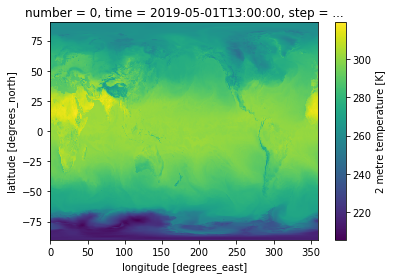

In [4]:
ds.t2m.isel(time=0).plot()

In [5]:

# xcube imports
from xcube.core.compute import compute_cube
from xcube.core.maskset import MaskSet
from xcube.core.geom import mask_dataset_by_geometry
from xcube.core.geom import clip_dataset_by_geometry

In [6]:
aoi = dict(type='Polygon', coordinates=[[[0.,30.],[0.,90.],[60.,90],[60.,0.],[0.,30]]] )

In [7]:
masked_ds = mask_dataset_by_geometry(ds,aoi)

In [8]:
masked_ds

<xarray.Dataset>
Dimensions:     (latitude: 360, longitude: 241, time: 61)
Coordinates:
    number      int32 0
  * time        (time) datetime64[ns] 2019-05-01T13:00:00 ... 2019-06-30T13:00:00
    step        timedelta64[ns] 00:00:00
    surface     int32 0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... 1.0 0.75 0.5 0.25
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 59.25 59.5 59.75 60.0
    valid_time  (time) datetime64[ns] 2019-05-01T13:00:00 ... 2019-06-30T13:00:00
Data variables:
    t2m         (time, latitude, longitude) float32 261.65878 ... 299.716
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-01-15T22:48:18 GRIB to CDM+CF via cfgrib-0....
    geospatial_lon_units:    degrees_east
    geospatial_lat_units:    degrees_north
    date_modified:           2020-01-15T22:48:24.025804

In [10]:
masked_ds.to_zarr('t2m_v1.zarr')